In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.integrate import quad
from math import log, exp, sqrt, pow
from matplotlib import rc
from matplotlib.colors import LogNorm
from scipy import interpolate

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

# constants
pi = 3.14159265359
alpha = 1/137.035999084  # fine structure constant
me = 510998.950  # e- mass [eV]
Mpl = 2e27  # planck mass [eV]
zeta3 = 1.202056903159594  # Riemann zeta(3)
amu = 931.494e6  # amu in eV

# conversion factors
s2eV = 6.582119569e-16  # Hz to eV
J2eV = 1.0 / 1.602176634e-19  # Joules to eV (1 / e)
m2eV = 1.973269804e-7  # m-1 to eV
K2eV = 8.617333262e-5  # Kelvin to eV
kg2eV = 5.609588604e35
T2eV = 2e2 # Tesla to eV2 conversion [eV2/T]
G2eV = 2e-2 # Gauss to eV2 conversion [eV2/G]

In [67]:
# load the AGSS09 solar model data
# the AGSS09 data come from https://web.archive.org/web/20220616154019/https://wwwmpa.mpa-garching.mpg.de/~aldos/SSM/AGSS09/model_agss09.dat
# gaunt factor z1/z2 come from https://bitbucket.org/Jacetoto/bremsstrahlung/src/master/Database-th/
# the energy-dependent photoelectric cross section is getted by digitizing the figure

# file = "/home/yuangw/Documents/GitHub/Chameleons/2406.01691/data/"
file = "/Users/yuangw/Documents/GitHub/chameleons/2406.01691/data/"
r = np.loadtxt(file + "r.dat")  # radial distance [eV-1]
T = np.loadtxt(file + "T.dat")  # solar temperature [eV]
rho = np.loadtxt(file + "rho.dat")  # solar density [eV4]
ne = np.loadtxt(file + "ne.dat")  # electron number density [eV3]
nbar = np.loadtxt(file + "nbar.dat")  # Z2-summed number density [eV3]
nbar2 = np.loadtxt(file + "nbar2.dat")  # Z2-summed number density minus electrons [eV3]
wp = np.loadtxt(file + "wp.dat")  # plasma frequency [eV]
nH = np.loadtxt(file + "nH.dat")  # H number density [eV3]
nHe3 = np.loadtxt(file + "nHe3.dat")  # He3 number density [eV3]
nHe4 = np.loadtxt(file + "nHe4.dat")  # He4 number density [eV3]
z1 = np.loadtxt(file + "Z1.dat")  # gaunt factors for Z=1
z2 = np.loadtxt(file + "Z2.dat")  # gaunt factors for Z=2
# z1 = np.loadtxt(file + "z1_saved.dat")  # gaunt factors for Z=1
# z2 = np.loadtxt(file + "z2_saved.dat")  # gaunt factors for Z=2
print('z1',np.shape(z2),np.shape(z1))
print(z1[100][50], z2[100][50])

# Define the interpolation functions for the solar model data vs. radius in [eV]
# rho_r = interpolate.interp1d(r, rho, fill_value=(0.0, 0.0), bounds_error=False)
# T_r = interpolate.interp1d(r, T, fill_value=(0.0, 0.0), bounds_error=False)
# ne_r = interpolate.interp1d(r, ne, fill_value=(0.0, 0.0), bounds_error=False)
# wp_r = interpolate.interp1d(r, wp, fill_value=(0.0, 0.0), bounds_error=False)
# nbar_r = interpolate.interp1d(r, nbar, fill_value=(0.0, 0.0), bounds_error=False)
# nbar2_r = interpolate.interp1d(r, nbar2, fill_value=(0.0, 0.0), bounds_error=False)
# nH_r = interpolate.interp1d(r, nH, fill_value=(0.0, 0.0), bounds_error=False)
# nHe3_r = interpolate.interp1d(r, nHe3, fill_value=(0.0, 0.0), bounds_error=False)
# nHe4_r = interpolate.interp1d(r, nHe4, fill_value=(0.0, 0.0), bounds_error=False)


z1 (501, 201) (501, 201)
15.261744323 14.87961328


### Chameleon production in Bulk Magnetic Fields

We integrate over the phase space to obtain the total production rate $\dot{N}$:
$$ \mathrm{d} \dot N = \mathrm{d}V \frac{\mathrm{d}^3k_\phi}{(2\pi)^3} \Gamma_\phi^{\operatorname{prod}} = \mathrm{d}V \frac{\mathrm{d}^3k_\phi}{(2\pi)^3}  (\frac{\beta_\gamma B_\perp}{M_\mathrm{Pl}})^2 \frac{k_\phi^2}{\vert\omega^2 - k_\gamma^2 - \pi_\gamma \vert^2} \frac{\Gamma_\gamma}{e^{\omega/T} -1}  $$
Hence 
$$  \frac{1}{\beta_\gamma^2}\frac{\mathrm{d}\dot N}{\mathrm{d}\omega} \!=\! \frac{2}{\pi M_\mathrm{Pl}^2} \!\int_0^{R_\odot} \!\!\mathrm{d}r \frac{r^2 B_\perp^2(r)}{e^{\omega/T(r)} - 1} \frac{\omega(\omega^2 - m^2)^{3/2}}{(m_\gamma^2 - m^2)^2 \!+\! (\omega \Gamma_\gamma)^2} \Gamma_\gamma  $$
we have assumed the following form:
$$\Gamma_\gamma = \Gamma^{\rm abs}-\Gamma^{\rm pro} = \frac{64\pi^2\alpha^3}{3m_e^2\omega^3} \sqrt{\frac{m_e}{2\pi T}} n_e \left( 1\!-\!e^{-\omega/T} \right)\sum_i Z^2 n_i F_i + \frac{8\pi\alpha^2}{3m_e^2} n_e   $$
where the sum is over all ion species in the Sun, and $F_i$ is the thermally-averaged Gaunt factor for species $i$.

/var/folders/jg/fgqgnyxs1tlcbr5x6bxs_gl40000gn/T/ipykernel_26565/3212972296.py:106: RuntimeWarning: overflow encountered in exp
  kernel = 2/(pi * Mpl**2) * (r[c]**2) * (B*B) *w * np.power(w*w - ms2, 1.5) / (np.power(ms2 - mg2, 2.0) + (w*w*G*G)) * G/(np.exp(w/T[c]) - 1)


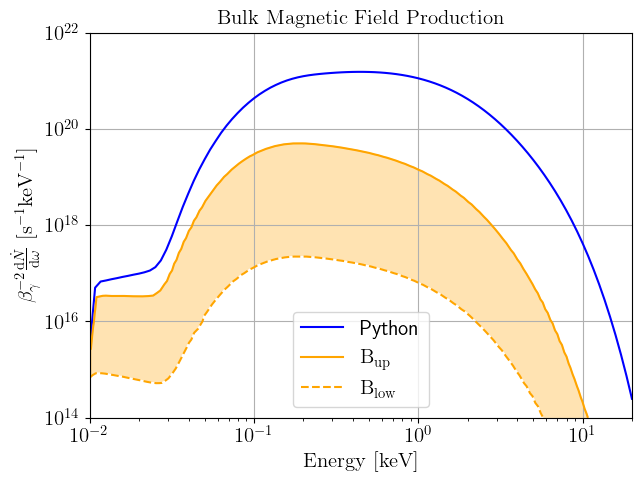

In [69]:
n=1
E = 2.4e-3   #eV
Bm = 100
rSolar = 6.957e8 / m2eV  # solar radius [eV-1]
radius = rSolar * np.logspace(-2, 0, 200)  # [eV-1]

# solar magnetic field parameters
B0 = 3000 * T2eV  # radiative zone max B [eV2]  200*T2eV;
B1 = 50 * T2eV  # tachocline max B [eV2]  4*T2eV;//
B2 = 3 * T2eV  # or 4, outer region max B [eV2]  3*T2eV;//
Bf = [B0, B1, B2]  # [eV2]

Rrad = 0.712 *rSolar  # [eV-1]  
Rtach = 0.732 *rSolar  # [eV-1]  
Rupper = 0.96 *rSolar  # [eV-1]   
dtach = 0.02 *rSolar  # [eV-1]   
dupper = 0.035 *rSolar  # [eV-1]  
arr = np.arange(1, 1968)

#chameleon model params n, Bm (matter coupling), assume rho dominated by matter density
def mCham2(c, Bm):  # effective mass square, Eq.18 in 2406.01691
    """Chameleon mass squared as a function of solar radius."""
    E4n = E**(4 + n)
    x = Bm * rho[c] / (n * Mpl * E4n)
    # x = np.clip(x, 1e-30, None) # set minimum value, avoid log(0) or negative value  
    return n * (n + 1) * E4n * np.power(Bm * rho[c] / (n * Mpl * E4n), (n + 2) / (n + 1))


def Bsolar(c):
    if r[c] <= Rrad:  # radiative zone
        lam = 8.12
        x = r[c] / Rrad
        return B0 * (1 + lam) * np.power(1 + 1 / lam, lam) * x**2 * np.power(1 - x**2, lam)
    
    elif Rtach - dtach < r[c] < Rtach + dtach: # tachocline
        return B1 * (1 - ((r[c] - Rtach) / dtach)**2.0)

    elif Rupper - dupper < r[c] < Rupper + dupper: # outer region
        return B2 * (1 - ((r[c] - Rupper) / dupper)**2.0)

    else:
        return 0.0

    
Bsolar_vec = np.vectorize(Bsolar)

# plt.plot(r[arr]/rSolar, Bsolar_vec(arr)/G2eV)
# plt.xlim(-0.01, 1.01)
# plt.ylim(1e1, 1e8)
# # plt.xscale('log')
# plt.yscale('log')
# plt.show()
# assert 0

def GammaPhoton(c, w, g1, g2):  # absorption-production, paper 2406.01691 Eq.A20

    p1 = 64 * pi**2 * np.power(alpha, 3)
    p2 = 3 * np.power(me, 2) * np.power(w, 3)
    p3 = me * np.power(ne[c], 2) / (2 * pi * T[c])
    p4 = 1 - np.exp(-w / T[c])
    p5 = 8 * pi * np.power(alpha, 2) * ne[c] / (3 * np.power(me, 2))

    # sum of ion densities
    ions = (nH[c] * g1) + g2 * (4 * nHe4[c] + 4 * nHe3[c])
    return p1 * np.power(p2, -1.0) * np.power(p3, 0.5) * p4 * ions + p5


####Find the nearest two temperatures T1, T2 in the table that bracket the actual physical temperature T_r(r) at that radius.
####But the table gives Θ = T / mₑ, so to compare with a physical T, you must divide by me when searching
def selectG(c, w):
    """Selects Gaunt factor from matrix and computes Gamma (eV)."""
    indexT1 = indexT2 = indexX1 = indexX2 = 0

    # convert Gaunt factor Theta to T in eV, Find indices for temperature interpolation
    for i in range(1, 200):
        if z1[0][i] < T[c]/me < z1[0][i + 1]:
            indexT1 = i
        if z2[0][i] < T[c]/me < z2[0][i + 1]:
            indexT2 = i

    # Find indices for frequency interpolation
    for i in range(1, 500):
        if (z1[i][0] * T[c]) < w < (z1[i + 1][0] * T[c]):
            indexX1 = i
        if (z2[i][0] * T[c]) < w < (z2[i + 1][0] * T[c]):
            indexX2 = i

    g1 = z1[indexX1][indexT1]
    g2 = z2[indexX2][indexT2]
    # print("Tr =", T[c], "IndexX1 =", indexX1, "IndexT1 =", indexT1, "g1 =", g1, "g2 =", g2)
    return GammaPhoton(c, w, g1, g2)


def B_integrand(c, w, Bm):  # [eV Bg-2] Eq.7 in paper 2406.01691
    """Differential scalar production rate due to magnetic field."""
    if T[c] == 0:
        return 0
    
    mg2 = 4 * pi * alpha * ne[c]/me
    ms2 = mCham2(c, Bm)
    if w**2 <= mg2 or w**2 <= ms2:
        return 0.0
    
    B = Bsolar_vec(c)
    G = selectG(c, w)
    kernel = 2/(pi * Mpl**2) * (r[c]**2) * (B*B) *w * np.power(w*w - ms2, 1.5) / (np.power(ms2 - mg2, 2.0) + (w*w*G*G)) * G/(np.exp(w/T[c]) - 1)
    # print('Magnetic = ', B, 'Gaunt = ', G, 'kernel = ', kernel)
    return kernel 

B_integrand_vec = np.vectorize(B_integrand)


def B_solarIntg(w, Bm, tachocline=False):
    total = 0.0
    for c in range(len(r) - 2):
        if tachocline:
            if r[c]/rSolar > 0.712: #r[c]/rSolar < 0.712 or r[c]/rSolar > 0.752:
                continue
        total +=  0.5 * (B_integrand(c + 1, w, Bm) + B_integrand(c, w, Bm)) * (r[c + 1] - r[c])
    # print('B_integrand(c + 1, Bm, w)', B_integrand(c + 1, Bm, w), 'total = ', total)
    return total * 1e3/s2eV  # factor 1e3/s2eV convert [eV/eV] to [s-1 keV-1]


w_array = np.logspace(1, 4.3, 100)  # [eV]
Bspectrum = np.array([B_solarIntg(wi, Bm=100) for wi in w_array])
# print('Bspectrum', Bspectrum)


Bdata1 = np.loadtxt("/Users/yuangw/Documents/GitHub/chameleons/AGSS09/Blow.csv")
Bdata2 = np.loadtxt("/Users/yuangw/Documents/GitHub/chameleons/AGSS09/Bup.csv")
B1x, B1y = Bdata1[:, 0], Bdata1[:, 1]  # bulk magnetic field [eV-1]
Blow = interpolate.interp1d(B1x, B1y, fill_value="extrapolate", bounds_error=False)
B2x, B2y = Bdata2[:, 0], Bdata2[:, 1]  # bulk magnetic field [eV-1]
Bup = interpolate.interp1d(B2x, B2y, fill_value="extrapolate", bounds_error=False)

plt.figure(figsize=(7, 5))
plt.plot(w_array/1e3, Bspectrum, color='blue', label='Python')
plt.plot(B2x, B2y, color='orange', label=r'${\rm B_{up}}$', linestyle='-')
plt.plot(B1x, B1y, color='orange', label=r'${\rm B_{low}}$', linestyle='--')
plt.fill_between(B2x, B2x*0.1, Bup(B2x), color='orange', alpha=0.3)
plt.fill_between(B1x, B1x*0.1, Blow(B1x), color='white')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0.01, 20)
plt.ylim(1e14, 1e22)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'${\rm Energy~[keV]}$', fontsize=15)
plt.ylabel(r'$\beta_\gamma^{-2}\frac{\mathrm{d}\dot N}{\mathrm{d}\omega}~[{\rm s^{-1} keV^{-1}}]$', fontsize=15)
plt.title(r'${\rm Bulk~Magnetic~Field~Production}$', fontsize=15)
plt.grid()
plt.legend(fontsize=15)
# plt.savefig('magnetic.pdf')
plt.show()